
# **Scraping Data Twitter**

In [ ]:
#import all libraries that we need :

#library for DataFrame
import pandas as pd

#Install snscrape modules & import itertools
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import itertools

#libary for export dataset to csv file
import csv

In [ ]:
#scraping data with keyword vaksin
df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper('jokowi').get_items(), 100))[['content']]
df

,content
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de..."
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣
...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja..."
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...


## **Exploratory Data Analysis (EDA)**

In [ ]:
df.head()

,content
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de..."
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣


In [ ]:
df.tail()

,content
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja..."
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...
99,@robert868686 @OssyDermawan @ProfYLH @SBYudhoy...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [ ]:
df.describe()

,content
count,100
unique,100
top,"BEM UI Disoal Gegara 'Gelar' Jokowi, BEM UNS: ..."
freq,1


In [ ]:
df.sample(20)

,content
93,@Fadim98171431 @AdeNursaadah @dzulfian @jokowi...
45,@tempodotco @PutraWadapi Pak @jokowi masalahny...
17,@tempodotco Sok banget lu pak jok.. Munafik.. ...
13,Tanggapan presiden @jokowi atas kritikan mahas...
43,Dia pernah jadi bawahannya jokowi malah dengan...
55,Heboh! BEM UI Kritik Jokowi Begini Tanggapan B...
73,@SaveMoslem1 Hayoloh..@erickthohir @jokowi \n\n😂😂
38,@yusuf_dumdum @jokowi Pas banget budaya tata k...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...
84,@pengangguranRI @KontraS @KPK_RI @jokowi Rakya...


In [ ]:
df.isnull().sum()

content    0
dtype: int64

In [ ]:
df.isna().sum()

content    0
dtype: int64

In [ ]:
df.content=df.content.astype(str)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/FinalProject_MiniBootcamp_BisaAI/dataset_jokowi.csv',index=None)

# **Data Preparation & Data Cleaning**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/FinalProject_MiniBootcamp_BisaAI/dataset_jokowi.csv')
df

,content
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de..."
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣
...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja..."
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...


In [ ]:
#  Cleaning text with Library Regex
import re
import string

In [ ]:
def clean_text(tweet):
    tweet = tweet.lower() # text lowercase
    tweet = re.sub('@[^\s]+', '', tweet) # remove usernames
    tweet = re.sub('\[.*?\]', '', tweet) # remove square brackets
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet) # remove URLs
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # remove punctuation
    tweet = re.sub('\w*\d\w*', '', tweet) 
    tweet = re.sub('[‘’“”…]', '', tweet)
    tweet = re.sub('\n', '', tweet)
    return tweet

    
tweet = lambda x: clean_text(x)

In [ ]:
df['clean1'] = pd.DataFrame(df.content.apply(tweet))
df

,content,clean1
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣
...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('indonesian'), additional)

df['clean2'] = (df['clean1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)])))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,clean1,clean2
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣
...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye


In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

list_hasil = df.clean2

output = [(stemmer.stem(token)) for token in list_hasil]

In [ ]:
df['clean3'] = output
df

,content,clean1,clean2,clean3
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,
...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye


In [ ]:
df.dropna()
df

,content,clean1,clean2,clean3
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,
...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye


In [1]:
#translate to english
!pip install deep_translator

In [ ]:
from deep_translator import GoogleTranslator

def translate(text):
    return GoogleTranslator(source='indonesian', target='en').translate(text)
#def hitung(text):
#    return len(text)

In [ ]:
#df['clean_english']=pd.DataFrame(df.clean3.apply(lambda x : hitung(x)))
#df = df.drop(df[(df.english== 0)].index)
#df.sort_values(by=['english'])
df['clean3'] = df['clean3'].replace([None, ''], 'jokowi')
df['clean_english']=pd.DataFrame(df.clean3.apply(lambda x : translate(x)))

In [ ]:
df

,content,clean1,clean2,clean3,clean_english
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...,Steady Jokowi Retreating Wisdom Kawal Returns ...
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...,Jokowi University of Halang Student Express Be...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...,Jokowi Leads Asajokowi Protected Asian Light A...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...,Jokowi's era students have not fierce fear of ...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,,
...,...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur,honest
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...,Jokowi BEM UIYA YES SAY KLEMARKLEMER BIPANG TH...
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...,eat your academic weight Jokowi successfully b...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye,this is somehow


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/FinalProject_MiniBootcamp_BisaAI/dataset_jokowi_clean_english.csv',index=None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/FinalProject_MiniBootcamp_BisaAI/dataset_jokowi_clean_english.csv')
df

,content,clean1,clean2,clean3,clean_english
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...,Steady Jokowi Retreating Wisdom Kawal Returns ...
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...,Jokowi University of Halang Student Express Be...
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...,Jokowi Leads Asajokowi Protected Asian Light A...
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...,Jokowi's era students have not fierce fear of ...
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,NaN,NaN
...,...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur,honest
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...,Jokowi BEM UIYA YES SAY KLEMARKLEMER BIPANG TH...
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...,eat your academic weight Jokowi successfully b...
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye,this is somehow


In [ ]:
df['label']=['positive','neutral','positive','positive','neutral','negative','neutral','negative','positive','neutral','neutral','positive','positive','negative','positive','positive','neutral','negative','negative','negative','negative','positive','negative','neutral','neutral','neutral','neutral','positive','negative','neutral','negative','neutral','negative','negative','positive','negative','negative','neutral','neutral','negative','neutral','positive','neutral','neutral','positive','negative','neutral','positive','neutral','negative','positive','positive','negative','neutral','positive','positive','negative','neutral','negative','positive','negative','positive','neutral','negative','negative','neutral','positive','neutral','neutral','positive','neutral','neutral','positive','neutral','negative','positive','positive','neutral','negative','positive','positive','positive','positive','negative','neutral','negative','negative','neutral','positive','negative','neutral','neutral','positive','neutral','negative','positive','neutral','neutral','positive','negative']
df

,content,clean1,clean2,clean3,clean_english,label
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...,Steady Jokowi Retreating Wisdom Kawal Returns ...,positive
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...,Jokowi University of Halang Student Express Be...,neutral
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...,Jokowi Leads Asajokowi Protected Asian Light A...,positive
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...,Jokowi's era students have not fierce fear of ...,positive
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,NaN,NaN,neutral
...,...,...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur,honest,positive
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...,Jokowi BEM UIYA YES SAY KLEMARKLEMER BIPANG TH...,neutral
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...,eat your academic weight Jokowi successfully b...,neutral
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye,this is somehow,positive


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/FinalProject_MiniBootcamp_BisaAI/dataset_jokowi_label.csv',index=None)

# **Modelling with unsupervised learning & Visualization**

In [ ]:
#modelling with textblob
from textblob import TextBlob

In [ ]:
df['clean_english'] = df['clean_english'].astype('str')
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['polarity'] = df['clean_english'].apply(get_polarity)
df

,content,clean1,clean2,clean3,clean_english,label,polarity
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...,Steady Jokowi Retreating Wisdom Kawal Returns ...,positive,0.166667
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...,Jokowi University of Halang Student Express Be...,neutral,0.000000
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...,Jokowi Leads Asajokowi Protected Asian Light A...,positive,0.200000
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...,Jokowi's era students have not fierce fear of ...,positive,0.000000
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,NaN,nan,neutral,0.000000
...,...,...,...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur,honest,positive,0.600000
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...,Jokowi BEM UIYA YES SAY KLEMARKLEMER BIPANG TH...,neutral,0.000000
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...,eat your academic weight Jokowi successfully b...,neutral,0.375000
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye,this is somehow,positive,0.000000


In [ ]:
df['sentimen_textblob']=''
df.loc[df.polarity>0,'sentimen_textblob']='positive'
df.loc[df.polarity==0,'sentimen_textblob']='neutral'
df.loc[df.polarity<0,'sentimen_textblob']='negative'
df

,content,clean1,clean2,clean3,clean_english,label,polarity,sentimen_textblob
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...,Steady Jokowi Retreating Wisdom Kawal Returns ...,positive,0.166667,positive
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...,Jokowi University of Halang Student Express Be...,neutral,0.000000,neutral
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...,Jokowi Leads Asajokowi Protected Asian Light A...,positive,0.200000,positive
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...,Jokowi's era students have not fierce fear of ...,positive,0.000000,neutral
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,NaN,nan,neutral,0.000000,neutral
...,...,...,...,...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur,honest,positive,0.600000,positive
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...,Jokowi BEM UIYA YES SAY KLEMARKLEMER BIPANG TH...,neutral,0.000000,neutral
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...,eat your academic weight Jokowi successfully b...,neutral,0.375000,positive
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye,this is somehow,positive,0.000000,neutral


In [ ]:
df['sentimen_textblob'].value_counts()

neutral     61
positive    27
negative    12
Name: sentimen_textblob, dtype: int64

In [ ]:
df['label'].value_counts()

neutral     36
positive    33
negative    31
Name: label, dtype: int64

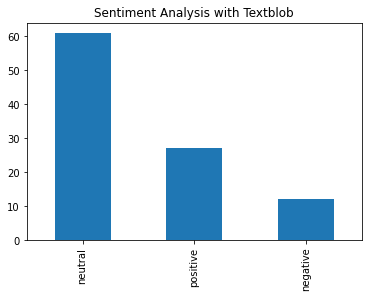

In [ ]:
df.sentimen_textblob.value_counts().plot(kind='bar',title="Sentiment Analysis with Textblob")

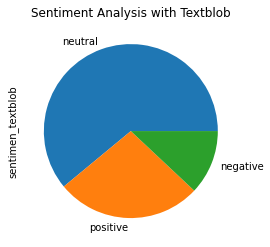

In [ ]:
df.sentimen_textblob.value_counts().plot(kind='pie',title="Sentiment Analysis with Textblob")

In [ ]:
#modelling with Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['scores'] = df['clean_english'].apply(lambda new_text: sid.polarity_scores(new_text))
df

,content,clean1,clean2,clean3,clean_english,label,polarity,sentimen_textblob,scores
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...,Steady Jokowi Retreating Wisdom Kawal Returns ...,positive,0.166667,positive,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp..."
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...,Jokowi University of Halang Student Express Be...,neutral,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...,Jokowi Leads Asajokowi Protected Asian Light A...,positive,0.200000,positive,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp..."
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...,Jokowi's era students have not fierce fear of ...,positive,0.000000,neutral,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp..."
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,NaN,nan,neutral,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur,honest,positive,0.600000,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...,Jokowi BEM UIYA YES SAY KLEMARKLEMER BIPANG TH...,neutral,0.000000,neutral,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...,eat your academic weight Jokowi successfully b...,neutral,0.375000,positive,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp..."
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye,this is somehow,positive,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentimen_vader']=''
df.loc[df.compound>0,'sentimen_vader']='positive'
df.loc[df.compound==0,'sentimen_vader']='neutral'
df.loc[df.compound<0,'sentimen_vader']='negative'
df

,content,clean1,clean2,clean3,clean_english,label,polarity,sentimen_textblob,scores,compound,sentimen_vader
0,"@ChomZdelaRoCa Mantap, pak Jokowi mundurlah de...",mantap pak jokowi mundurlah dengan bijak dan ...,mantap jokowi mundurlah bijak kawal pulang sol...,mantap jokowi mundur bijak kawal pulang solo d...,Steady Jokowi Retreating Wisdom Kawal Returns ...,positive,0.166667,positive,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",0.7845,positive
1,Jokowi: Universitas Tidak Perlu Menghalangi Ma...,jokowi universitas tidak perlu menghalangi mah...,jokowi universitas menghalangi mahasiswa berek...,jokowi universitas halang mahasiswa ekspres be...,Jokowi University of Halang Student Express Be...,neutral,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,@logic_editor Jokowi Pemimpin Asia\nJokowi Pel...,jokowi pemimpin asiajokowi pelindung asiajoko...,jokowi pemimpin asiajokowi pelindung asiajokow...,jokowi pimpin asiajokowi lindung asiajokowi ca...,Jokowi Leads Asajokowi Protected Asian Light A...,positive,0.200000,positive,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.4404,positive
3,@Mugundi @VIVAcoid @bemkmipb mahasiswa jaman j...,mahasiswa jaman jokowi udah ngga segarang d...,mahasiswa jaman jokowi udah ngga segarang taku...,mahasiswa jaman jokowi udah ngga garang takut ...,Jokowi's era students have not fierce fear of ...,positive,0.000000,neutral,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...",0.3875,positive
4,@tunggul_edward @dzulfian @jokowi 🤣🤣🤣,🤣🤣🤣,🤣🤣🤣,NaN,nan,neutral,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...
95,@metimecoffee @KontraS @MCAOps @KPK_RI @jokowi...,siapa yang jujur,jujur,jujur,honest,positive,0.600000,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5106,positive
96,"JOKOWI JAWAB BEM UI:\n\n""Ya, Itukan sudah seja...",jokowi jawab bem uiya itukan sudah sejak lama ...,jokowi bem uiya itukan ya bilang klemarklemer ...,jokowi bem uiya itu ya bilang klemarklemer ngo...,Jokowi BEM UIYA YES SAY KLEMARKLEMER BIPANG TH...,neutral,0.000000,neutral,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.5319,positive
97,@mulanbilqis @agussusilo7562 @RamliRizal Makan...,makan itu bobot akedemis mu itu jokowi suks...,makan bobot akedemis mu jokowi sukses jd presi...,makan bobot akedemis mu jokowi sukses jd presi...,eat your academic weight Jokowi successfully b...,neutral,0.375000,positive,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.4939,positive
98,@kurawa @KemenegBUMN @jokowi iki piye Pak? @er...,iki piye pak kok bisa pak,iki piye,iki piye,this is somehow,positive,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [ ]:
df['sentimen_vader'].value_counts()

neutral     41
positive    32
negative    27
Name: sentimen_vader, dtype: int64

In [ ]:
df['sentimen_textblob'].value_counts()

neutral     61
positive    27
negative    12
Name: sentimen_textblob, dtype: int64

In [ ]:
df['label'].value_counts()

neutral     36
positive    33
negative    31
Name: label, dtype: int64

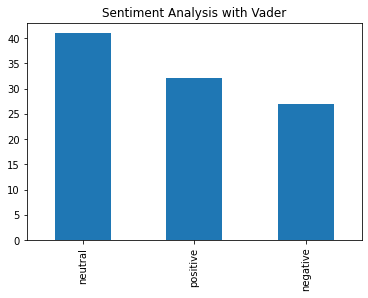

In [ ]:
df.sentimen_vader.value_counts().plot(kind='bar',title="Sentiment Analysis with Vader")

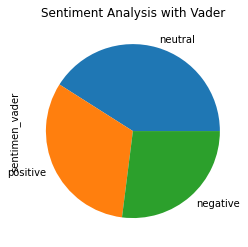

In [ ]:
df.sentimen_vader.value_counts().plot(kind='pie',title="Sentiment Analysis with Vader")

## **Accuracy**

In [ ]:
#accuracy textblob

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(df['label'],df['sentimen_textblob'])

0.55

In [ ]:
print(classification_report(df['label'],df['sentimen_textblob']))

              precision    recall  f1-score   support

    negative       0.83      0.32      0.47        31
     neutral       0.46      0.78      0.58        36
    positive       0.63      0.52      0.57        33

    accuracy                           0.55       100
   macro avg       0.64      0.54      0.54       100
weighted avg       0.63      0.55      0.54       100



In [ ]:
#Confusion Matrix Testing
cm_pred = confusion_matrix(df['label'],df['sentimen_textblob'])
print(cm_pred)

[[10 17  4]
 [ 2 28  6]
 [ 0 16 17]]


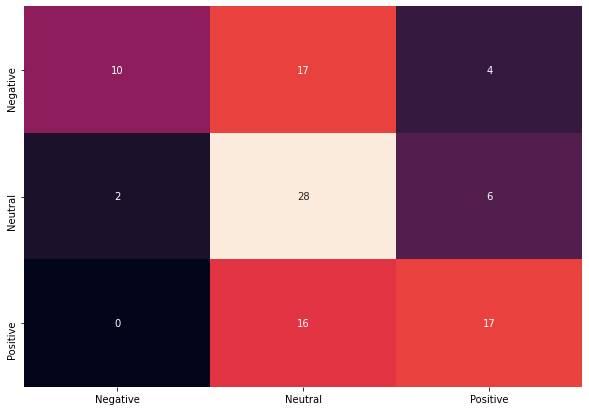

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm_pred = pd.DataFrame(cm_pred, index = [i for i in ["Negative", "Neutral", "Positive"]],
                          columns = [i for i in ["Negative", "Neutral", "Positive"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_pred, annot=True, cbar=False, fmt="d")

In [ ]:
#accuracy vader

In [ ]:
accuracy_score(df['label'],df['sentimen_vader'])

0.68

In [ ]:
print(classification_report(df['label'],df['sentimen_vader']))

              precision    recall  f1-score   support

    negative       0.74      0.65      0.69        31
     neutral       0.71      0.81      0.75        36
    positive       0.59      0.58      0.58        33

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



In [ ]:
#Confusion Matrix Testing
cm_pred = confusion_matrix(df['label'],df['sentimen_vader'])
print(cm_pred)

[[20  4  7]
 [ 1 29  6]
 [ 6  8 19]]


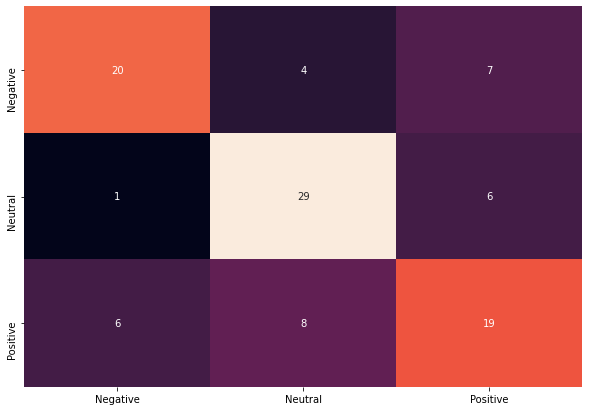

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm_pred = pd.DataFrame(cm_pred, index = [i for i in ["Negative", "Neutral", "Positive"]],
                          columns = [i for i in ["Negative", "Neutral", "Positive"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_pred, annot=True, cbar=False, fmt="d")